<a href="https://colab.research.google.com/github/anandusateeshNSUT/Hand-Sign-Recognition-CNN/blob/main/ISL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **For downloading the dataset from Kaggle**

In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Downloading the Dataset to the root directory**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
dataset_url = "https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anandu08
Your Kaggle Key: ··········


100%|██████████| 4.20G/4.20G [00:37<00:00, 120MB/s]


In [ ]:
from os import listdir

In [ ]:
total_signs=sorted(listdir("/content/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"))
print(total_signs)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam

from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

## **Plotting some random images in the dataset**

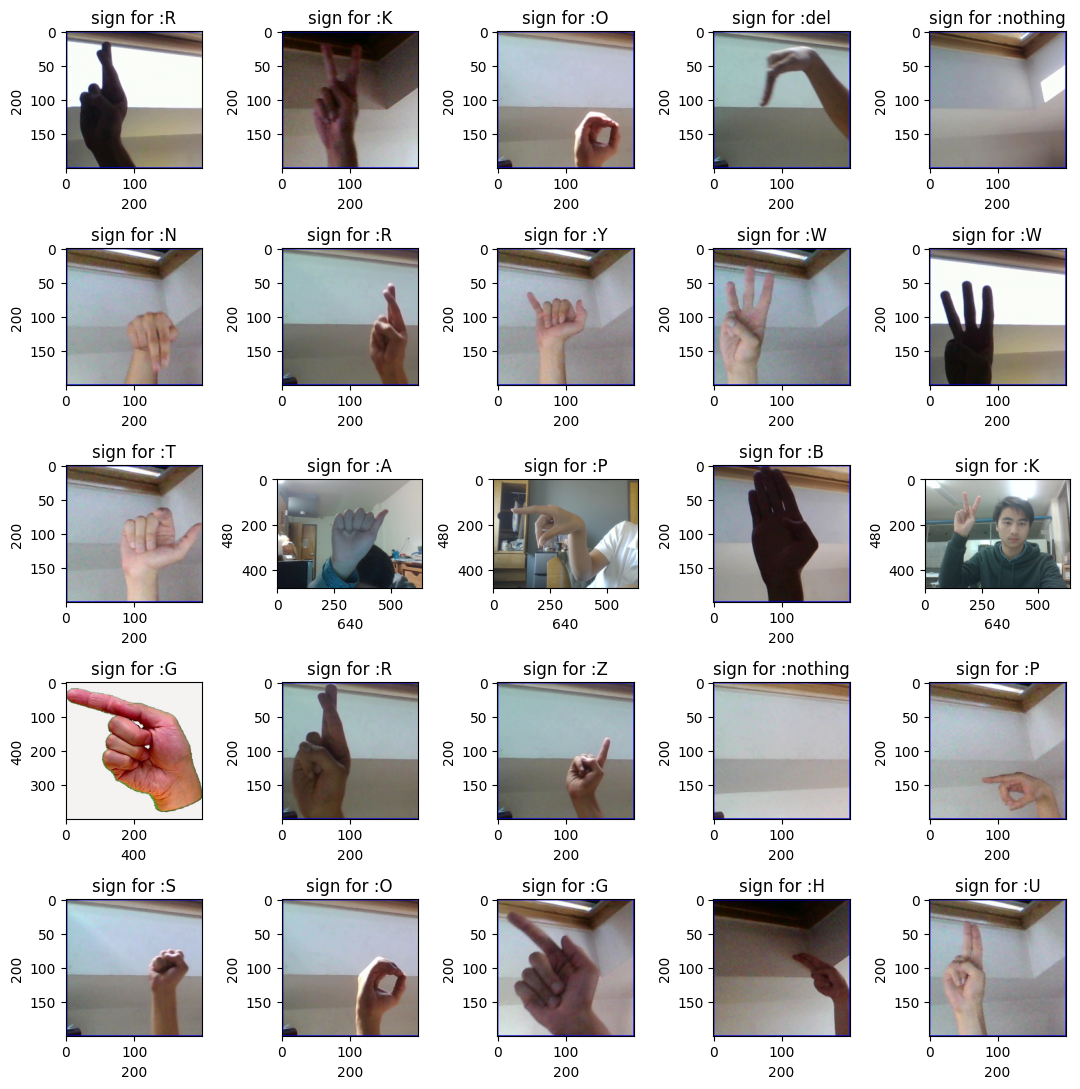

In [ ]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "/content/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    directry=random.choice(total_signs)
    rand_img = imread(path +'/'+ directry+'/'+random.choice(sorted(listdir(path+'/'+directry+'/'))))
    plt.imshow(rand_img)
    plt.title('sign for :'+directry)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
dir1 = "/content/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_train"
root_dir = listdir(dir1)
image_list, label_list = [], []
print(root_dir)

['R', 'N', 'Q', 'E', 'del', 'B', 'Z', 'L', 'O', 'D', 'M', 'K', 'X', 'C', 'nothing', 'V', 'G', 'I', 'P', 'Y', 'F', 'W', 'U', 'H', 'J', 'space', 'T', 'A', 'S']


# Resizing Each image and appending them to an Image list and their directory name to the label list

In [ ]:
for directory in root_dir:
    i=0
    for files in listdir(f"{dir1}/{directory}"):
        image_path = f"{dir1}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50))
        image = img_to_array(image)
        image_list.append(image)
        i+=1
        label_list.append(directory)
        if i>3000:
          break
        

In [ ]:
# Visualize the number of classes count
print(directory)
label_counts = pd.DataFrame(label_list).value_counts()
sorted(label_counts)

S


[3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001,
 3001]

In [ ]:
num_classes = len(label_counts)
num_classes

29

In [ ]:
np.array(image_list).shape

(87029, 50, 50, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(87029,)

## **Splitting the lists as 80% Train and 20% Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape( -1, 50,50,3)
x_test = x_test.reshape( -1, 50,50,3)

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
print(y_train.shape)
print(x_train.shape)

(55698, 29)
(55698, 50, 50, 3)


## **Creating a CNN model and printing the model summary**

In [ ]:
import tensorflow as tf

model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(50,50,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Flatten())

model.add(Dense(40, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 90)        26010     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 90)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 90)          72990     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 90)         0

## Training the model

In [ ]:
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(monitor='val-loss', patience=3)
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 32, epochs =5,validation_data=(x_val,y_val),callbacks=[early_stopping])
#early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

Epoch 1/5
1741/1741 [==============================] - ETA: 0s - loss: 2.0048 - accuracy: 0.3965

1741/1741 [==============================] - 28s 8ms/step - loss: 2.0048 - accuracy: 0.3965 - val_loss: 0.9727 - val_accuracy: 0.6931
Epoch 2/5
1732/1741 [============================>.] - ETA: 0s - loss: 0.6902 - accuracy: 0.7802

1741/1741 [==============================] - 12s 7ms/step - loss: 0.6892 - accuracy: 0.7804 - val_loss: 0.5651 - val_accuracy: 0.8170
Epoch 3/5
1735/1741 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.8669

1741/1741 [==============================] - 12s 7ms/step - loss: 0.4206 - accuracy: 0.8670 - val_loss: 0.3705 - val_accuracy: 0.8860
Epoch 4/5
1735/1741 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.9011

1741/1741 [==============================] - 11s 6ms/step - loss: 0.3093 - accuracy: 0.9012 - val_loss: 0.3150 - val_accuracy: 0.9020
Epoch 5/5
1734/1741 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9219

1741/1741 [==============================] - 11s 6ms/step - loss: 0.2436 - accuracy: 0.9220 - val_loss: 0.2796 - val_accuracy: 0.9145


## **Plotting the accuracy-epoch graph while training**

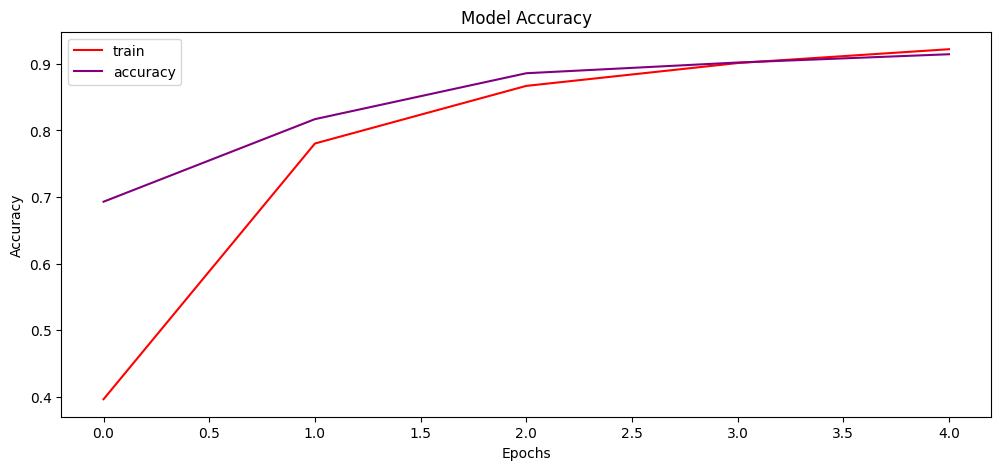

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='purple')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'accuracy'])
plt.show()

## **Plotting the loss-epoch graph while training**

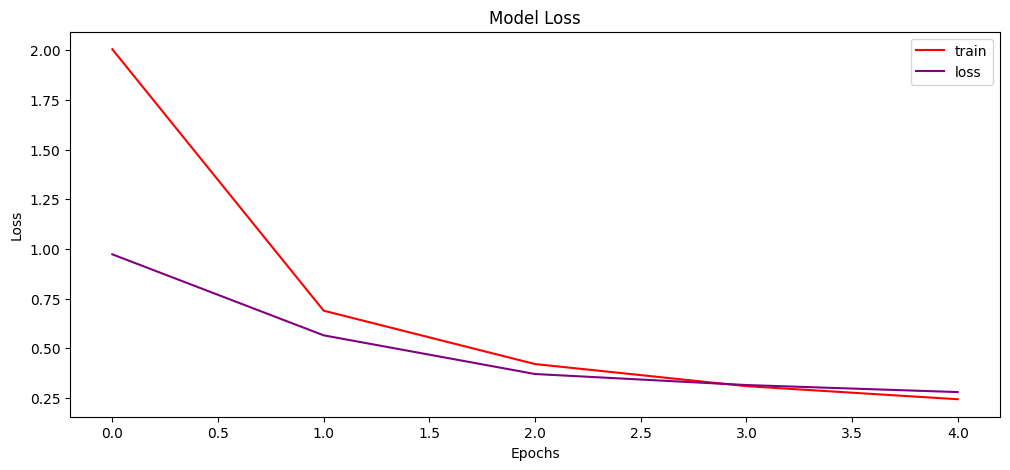

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='purple')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'loss'])
plt.show()

## **Accuracy of the model on the test set**

In [ ]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

544/544 [==============================] - 2s 4ms/step - loss: 0.2808 - accuracy: 0.9147
Test Accuracy: 91.46845936775208


In [ ]:
import os
labels = sorted([folder for folder in os.listdir('/content/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/') if not folder.startswith('.')])

In [ ]:
with open('labels.txt', 'w') as file:
    for label in labels:
      file.write(label)
      file.write('\n')

In [ ]:
f = open("labels.txt",'r')
f.readlines()

['asl_alphabet_test\n', 'asl_alphabet_train\n']

## **Saving the model**

In [ ]:
model.save("/content/ihsr/")

## **Importing a random image from the local directory to evaluate the model.**

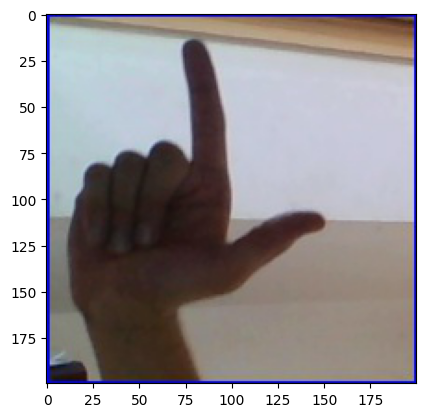

In [ ]:
image = Image.open("/content/aslamerican-sign-language-aplhabet-dataset/ASL_Alphabet_Dataset/asl_alphabet_test/L_test.jpg")
plt.imshow(image)


In [ ]:
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np
from tensorflow.keras import preprocessing
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax
import os
import h5py


## **Testing the model on the above imported image**

In [ ]:
shape = ((50,50,3))
model = tf.keras.Sequential([hub.KerasLayer(model,input_shape=shape)])
test_image = image.resize((50,50))
test_image = preprocessing.image.img_to_array(test_image)
test_image = test_image / 255
test_image = np.expand_dims(test_image, axis =0)
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
predictions = model.predict(test_image)
scores = tf.nn.softmax(predictions[0])
scores = scores.numpy()
image_class = class_names[np.argmax(scores)]
print(image_class)

1/1 [==============================] - 0s 93ms/step
L


## **Converting the model to tflite model for deploying to a Raspberry PI**

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/ihsr')
tflite_model = converter.convert()
with open('ihsr.tflite', 'wb') as f:
    f.write(tflite_model)

## **Testing the tflite model as well on the above imported image**

In [ ]:
tflite_model_path='/content/ihsr.tflite'
interpreter=tf.lite.Interpreter(tflite_model_path)
interpreter.allocate_tensors()
input_details=interpreter.get_input_details()
output_details=interpreter.get_output_details()
input_data=test_image
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data_tflite=interpreter.get_tensor(output_details[0]['index'])
final_prediction=output_data_tflite.argmax()
# pred=labels[final_prediction]
# pred
final_prediction

11

In [ ]:
class_names[final_prediction]

'L'